In [1]:
import numpy as np
import pandas as pd
import SciServer.CasJobs as CasJobs # query with CasJobs, the primary database for the SDSS
import SciServer.SkyServer as SkyServer # show individual objects through SkyServer
import SciServer.SciDrive
import warnings
from PIL import Image

warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\Jason\\Documents\\SJSU\\JPAstro\\Notebooks'

In [3]:
SH_MDG = pd.read_csv('..\Sheets\SH_MDG.csv')
# SH_MDG

In [4]:
crossmatchQuery = '''CREATE TABLE #upload ( up_id int, up_ra float, up_dec float ) 
INSERT INTO #upload values ( 1, 49.43464, 40.87648),( 2, 50.71059, 40.90011),( 3, 50.43778, 40.96237),( 4, 50.55783, 40.95394),( 5, 50.27557, 40.97107),( 6, 49.08633, 40.97127),( 7, 50.33284, 40.99509),( 8, 50.01600, 41.05777),( 9, 50.52619, 41.08242),( 10, 49.26452, 41.09188),( 11, 49.54948, 41.23287),( 12, 49.81257, 41.23137),( 13, 50.71703, 41.24594),( 14, 49.71770, 41.26755),( 15, 50.34345, 41.27714),( 16, 49.61810, 41.28606),( 17, 49.42728, 41.32309),( 18, 48.92604, 41.31836),( 19, 50.14164, 41.37964),( 20, 49.78269, 41.41263),( 21, 50.33074, 41.41562),( 22, 49.21440, 41.45938),( 23, 50.06715, 41.48258),( 24, 50.34479, 41.50313),( 25, 49.01468, 41.52288),( 26, 49.51195, 41.51297),( 27, 50.28064, 41.53824),( 28, 50.47216, 41.56143),( 29, 50.49371, 41.57921),( 30, 49.42844, 41.59988),( 31, 49.86271, 41.60818),( 32, 49.39353, 41.62147),( 33, 49.79257, 41.67811),( 34, 50.49710, 41.78499),( 35, 49.48984, 41.77585),( 36, 50.63848, 41.79206),( 37, 49.60997, 41.81874),( 38, 49.44231, 41.93492),( 39, 50.32299, 41.97126),( 40, 50.56341, 41.97293),( 41, 50.02595, 42.00451),( 42, 49.78714, 42.13901),( 43, 50.17779, 42.20089),( 44, 49.48429, 42.20973),( 45, 49.70962, 42.31499),( 46, 50.35571, 40.90381),( 47, 49.84918, 41.09801),( 48, 50.07848, 41.09704),( 49, 50.48358, 41.10194),( 50, 49.76534, 41.19418),( 51, 50.32510, 41.40939),( 52, 48.87942, 41.48487),( 53, 50.02964, 41.53824),( 54, 50.12943, 41.56757),( 55, 49.24521, 41.68621),( 56, 50.18575, 42.03045)
create table #x (up_id int,objID bigint)
INSERT INTO #x 
SELECT up_id, dbo.fGetNearestObjIdEq(up_ra,up_dec,0.5) as objId 
     FROM #upload WHERE dbo.fGetNearestObjIdEq(up_ra,up_dec,0.5) IS NOT NULL 
SELECT
p.objID, 
dbo.fPhotoTypeN(p.type) as type,
p.ra, p.dec,
p.modelMag_r, 
p.modelMag_u - p.modelMag_g as u_g, 
p.modelMag_g - p.modelMag_z as g_z, 
p.modelMag_g - p.modelMag_r as g_r, 
p.modelMag_g - p.modelMag_i as g_i, 
p.modelMag_r - p.modelMag_i as r_i, 
p.modelMag_r - p.modelMag_z as r_z, 
p.flags, dbo.fPhotoFlagsN(p.flags) as flag_text
FROM #upload u
JOIN #x x ON x.up_id = u.up_id
JOIN PhotoTag p ON p.objID = x.objID 
ORDER BY x.up_id
'''
crossDf = CasJobs.executeQuery(crossmatchQuery, "dr16")
# crossDf

In [5]:
outDir = '..\Images\SH_MDG'
img_width, img_height = 200, 200
SkyServer_DataRelease = 'DR16'

# # if len(outDir) == len(radDf['objID']):
# if len(outDir) > 10:
#     print('Skipping populate')
# else:
#     for id, z, r, d in zip(crossDf['objID'], crossDf['z'], crossDf['ra'], crossDf['dec']):
#         img_array = SkyServer.getJpegImgCutout(ra=r, dec=d, width=img_width, height=img_height, scale=0.1, 
#                                      dataRelease=SkyServer_DataRelease)
#         # print(f'{id}-label={labeler(z)}')
#         # outPicTemplate = f'{id}-label={labeler(z)}.png'
#         outPicTemplate = f'{id}.png'
        
#         img0 = Image.fromarray(img_array, 'RGB')
#         img0.save(f'{outDir}/{outPicTemplate}')


for id, r, d in zip(crossDf['objID'], crossDf['ra'], crossDf['dec']):
    img_array = SkyServer.getJpegImgCutout(ra=r, dec=d, width=img_width, height=img_height, scale=0.1, 
                                 dataRelease=SkyServer_DataRelease)
    # print(f'{id}-label={labeler(z)}')
    # outPicTemplate = f'{id}-label={labeler(z)}.png'
    outPicTemplate = f'{id}.png'
    
    img0 = Image.fromarray(img_array, 'RGB')
    img0.save(f'{outDir}/{outPicTemplate}')

In [6]:
crossDf

,objID,type,ra,dec,modelMag_r,u_g,g_z,g_r,g_i,r_i,r_z,flags,flag_text
0,1237661082662404973,GALAXY,49.434658,40.876480,17.06913,1.810234,1.285440,0.769035,1.156576,0.387541,0.516405,35253360136208,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP CO...
1,1237661055282119523,GALAXY,50.710497,40.900186,20.92502,1.749641,1.837076,1.123869,1.505318,0.381449,0.713207,105622137733136,DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY BI...
2,1237661055282054357,GALAXY,50.437752,40.962316,18.14545,1.369568,0.947846,0.483532,0.723852,0.240320,0.464313,263953926197336,PSF_FLUX_INTERP DEBLEND_NOPEAK DEBLENDED_AT_ED...
3,1237661055282120491,GALAXY,50.557756,40.953899,17.30180,1.812160,1.486753,0.862648,1.260906,0.398258,0.624105,105624251797848,DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY MO...
4,1237661083199471946,GALAXY,50.275935,40.972246,18.07482,3.237286,1.894783,1.140043,1.715561,0.575518,0.754740,105622105100560,DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY BI...
5,1237661082662273421,GALAXY,49.086137,40.971285,17.97118,2.893913,1.212559,0.818390,1.191320,0.372930,0.394169,105622105362704,DEBLEND_NOPEAK DEBLENDED_AT_EDGE STATIONARY BI...
6,1237661055282053207,GALAXY,50.332798,40.995054,18.14707,2.028221,1.267813,0.961384,1.380001,0.418617,0.306429,35253360398680,DEBLENDED_AT_EDGE STATIONARY BINNED1 SATURATED...
7,1237661083199342924,GALAXY,50.015993,41.057654,18.05915,1.219753,1.145214,0.625383,0.996256,0.370872,0.519831,175992995971344,PSF_FLUX_INTERP DEBLENDED_AT_EDGE STATIONARY M...
8,1237661055282053546,GALAXY,50.527160,41.081803,16.69114,1.495518,1.399714,0.823191,1.207630,0.384439,0.576523,35253360136208,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP CO...
9,1237670458048119587,GALAXY,49.264546,41.091962,18.66797,5.132727,1.245075,0.789301,1.206560,0.417259,0.455774,35253360132368,DEBLENDED_AT_EDGE STATIONARY BINNED1 INTERP NO...


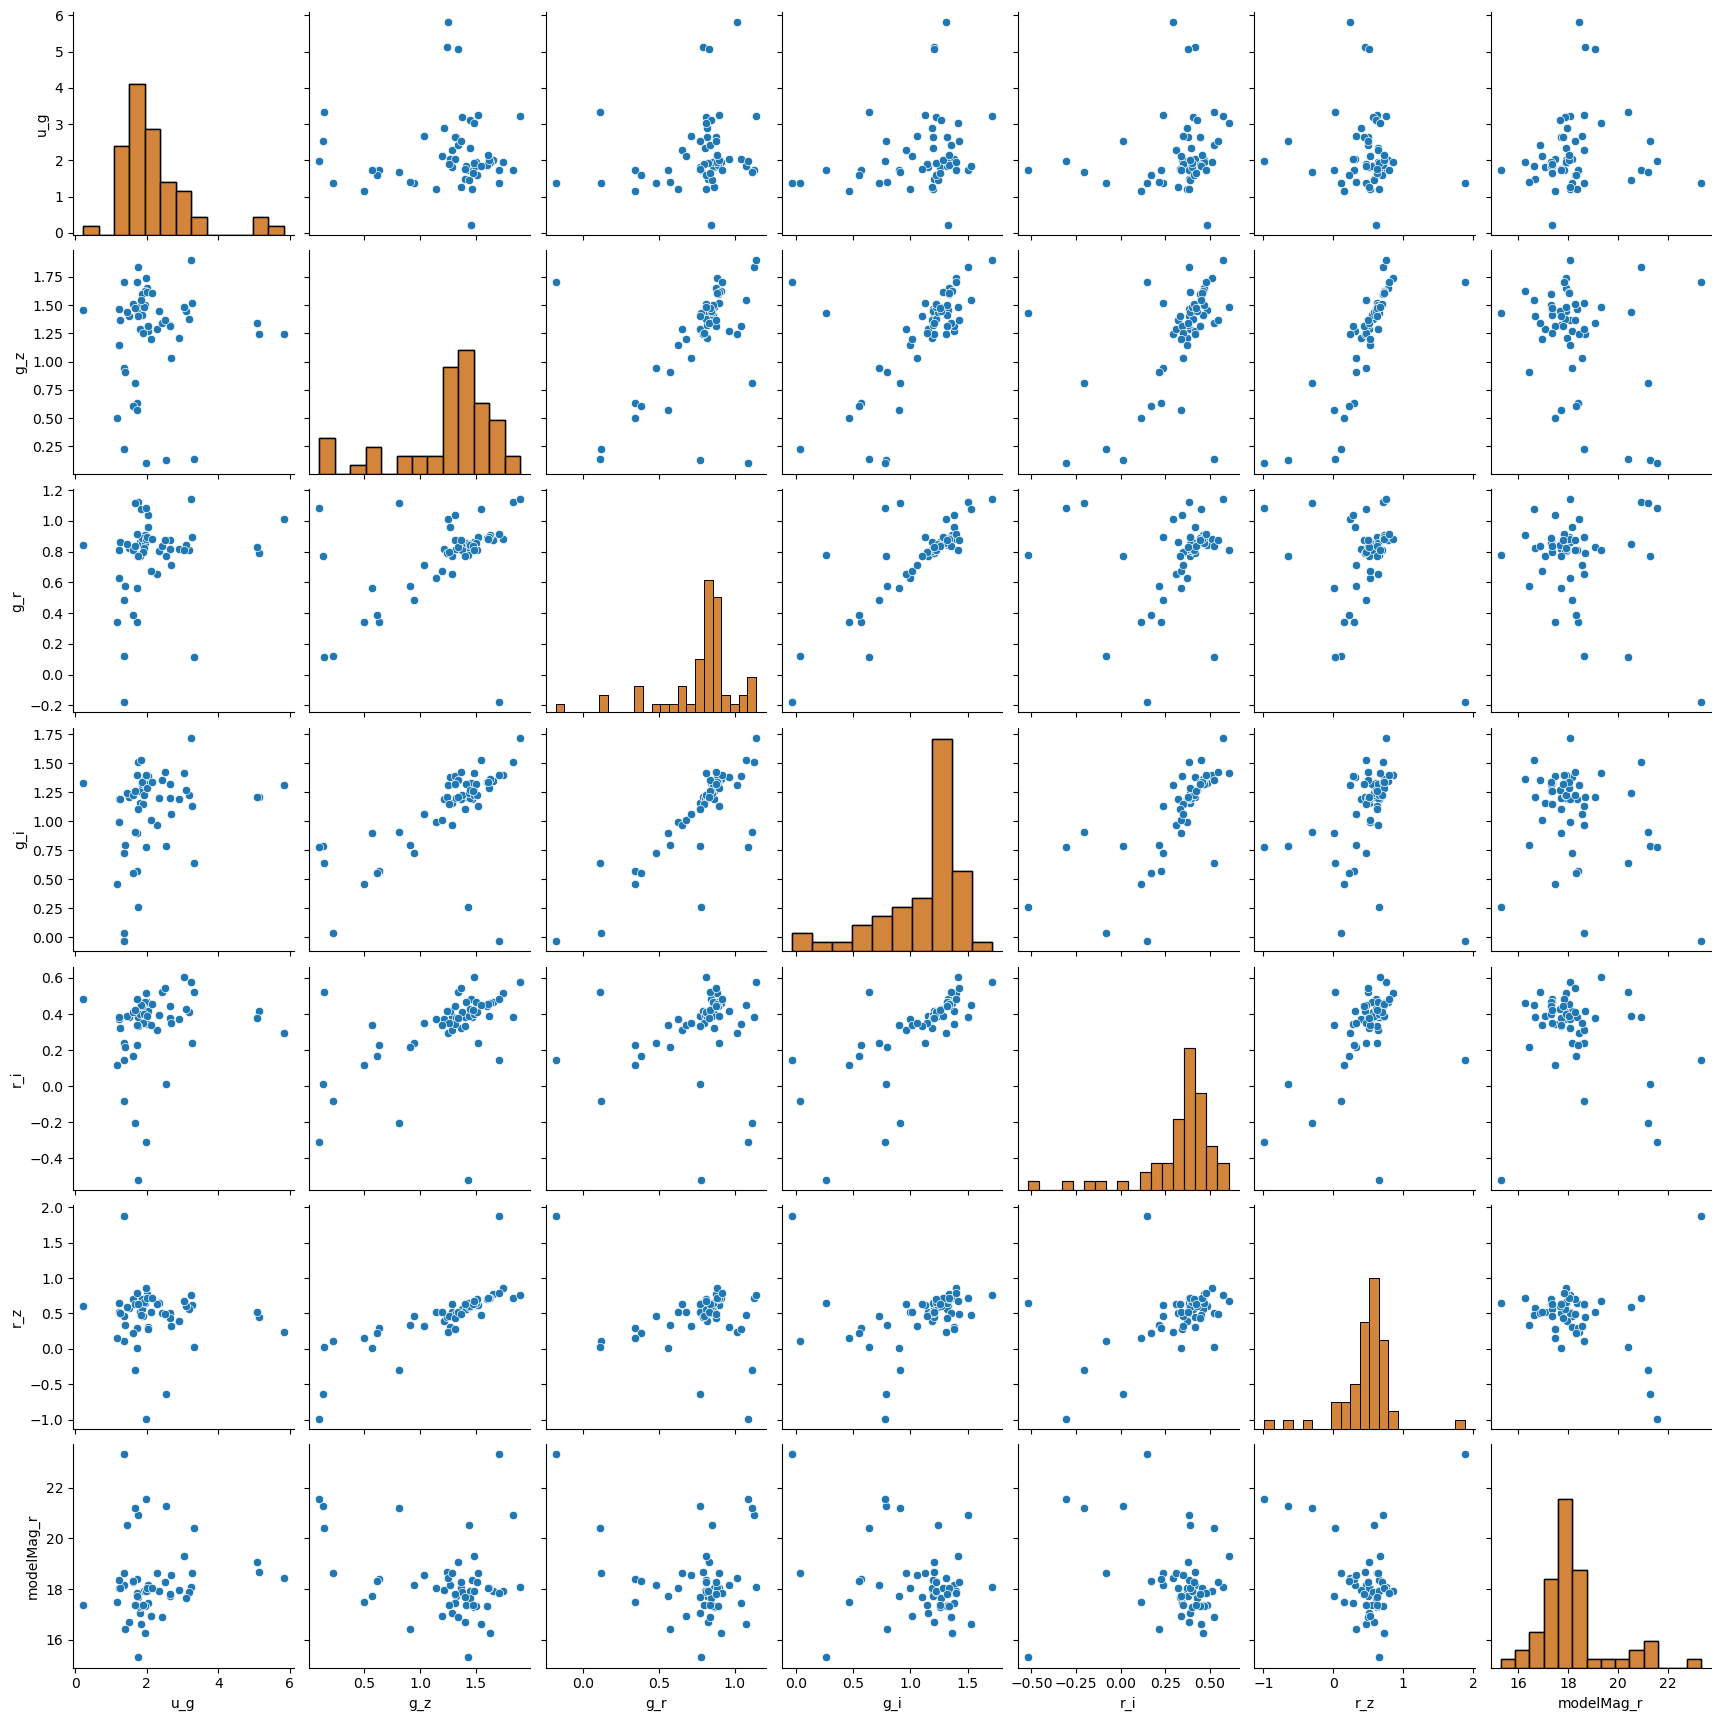

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Want Color-magnitude plot ##
pairDf = crossDf[['u_g', 'g_z', 'g_r', 'g_i', 'r_i', 'r_z', 'modelMag_r',]]
p1 = sns.pairplot(pairDf, corner = False)
p1.map_diag(sns.histplot)


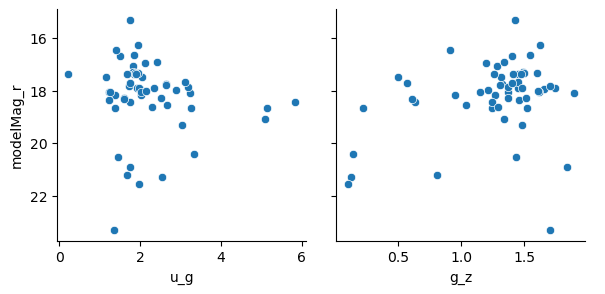

In [8]:
# x_vars = ["u_g", "g_z", "modelMag_r", "petroRad_r"]
x_vars = ["u_g", "g_z"]
y_vars = ["modelMag_r"]
g = sns.PairGrid(pairDf, x_vars=x_vars, y_vars=y_vars, height = 3)
# g.map_diag(sns.histplot, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# g.axes[0, 0].set_ylim(modMagr_lim[::-1])
# g.axes[0, 0].set_xlim(ug_lim[::-1])
# g.axes[0, 0].set_xlim(ug_lim[::-1])

# g.axes[0, 1].set_xlim(gz_lim[::-1])


In [15]:
def dra_dec(ra,dec,ra0,dec0) :
	''' calculate angular separation in RA and Dec,
    	given input coords and reference coords,
    	all in radians
	'''
	dra = (np.sin(ra - ra0) * np.cos(dec))
	ddec = -np.cos(ra - ra0) * np.cos(dec) * np.sin(dec0) + np.sin(dec) * np.cos(dec0)
	return np.array([dra, ddec]) # in radians

ra0, dec0 = 49.9506671, 41.5116961 # NGC 1275, from NED


In [36]:
clustCent_R = []
for id, ra, dec in zip(pairDf['objID'], pairDf['ra'], pairDf['dec']):
    dra, ddec = dra_dec(np.radians(ra), np.radians(dec), np.radians(ra0), np.radians(dec0))
    R_clust = np.sqrt(dra**2+ddec**2) * 75e3
    clustCent_R.append(R_clust)
pairDf['ClusterCentRad'] = clustCent_R
# pairDf

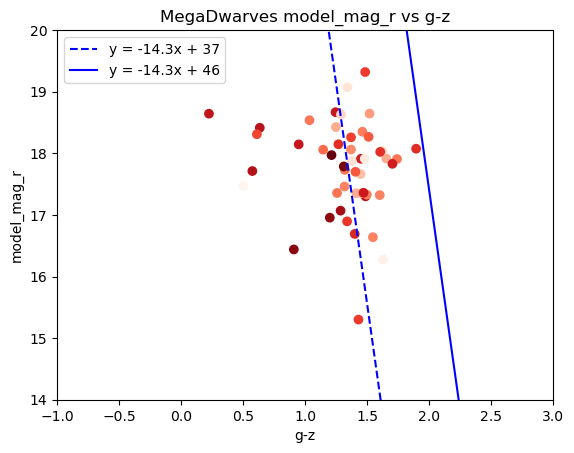

In [35]:
gz_lim = (1.25, 2.00)
ug_lim = (1.45, 2.30)
# modMagr_lim = (14.0, 18.00)
modMagr_lim = (14.0, 20)
petroRad_r_lim = (0, 20)

x1 = pairDf['u_g']
x2 = pairDf['g_z']
x3 = pairDf['modelMag_r']
top_slope = 1.78
bot_slope = 1.1
bot_intercept = -.20
top_intercept = .70
gz_slope = -14.3
gz_intercept1 = 37
gz_intercept2 = 46 # is this one intense enough?

x1 = pairDf['u_g']
x2 = pairDf['g_z']

x3 = pairDf['modelMag_r']
xx = np.linspace(1, 2.5) 
plt.figure()
plt.scatter(x2, x3, c = pairDf['ClusterCentRad'], cmap = 'Reds')
plt.plot(xx, xx*gz_slope + gz_intercept1, 'b--', label = f'y = {str(gz_slope)}x + {str(gz_intercept1)}')
plt.plot(xx, xx*gz_slope + gz_intercept2, 'b-', label = f'y = {str(gz_slope)}x + {str(gz_intercept2)}')
plt.ylim(modMagr_lim)
# # plt.xlim(gz_lim)
plt.xlim((-1, 3))
# plt.axhline(y=1.65)
# plt.axhline(y=1.40, color = 'r', label = 'y = 1.40')
# plt.axvline(x=1.60, color = 'r')
plt.xlabel('g-z')
plt.ylabel('model_mag_r')
plt.title('MegaDwarves model_mag_r vs g-z')
plt.legend()
plt.show()